In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


In [4]:
rootv=[1.414, 1.581, 1.732, 1.871, 2.0, 2.121, 2.236 ]
recipD_1=[0.018, 0.020,0.022, 0.024, 0.025, 0.027, 0.028]

rootv=np.array(rootv)
recipD_1=np.array(recipD_1)

In [6]:
def linfit(x, y):
    # Fit x andywithalinear polynomial (degree 1)
    coeffs = np.polyfit(x, y, 1)
    return coeffs

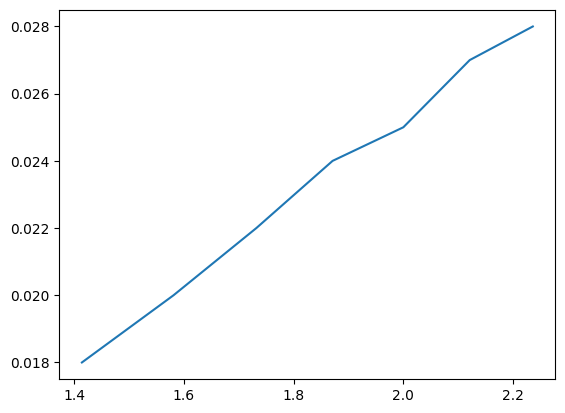

In [5]:
plt.plot(rootv, recipD_1)

In [8]:
m,c=linfit(rootv, recipD_1)
print(m)
print(c)

0.012338840748593765
0.0005929025859953873


In [ ]:
rootv=[]
recipD_1=[]

rootv=np.array(rootv)
recipD_1=np.array(rootv)

# -----------------------------------------------------------

# The true analysis starts here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

plt.rcParams["axes.linewidth"]  = 2.0
plt.rcParams["xtick.major.size"]  = 10
plt.rcParams["xtick.minor.size"]  = 5
plt.rcParams["ytick.major.size"]  = 10
plt.rcParams["ytick.minor.size"]  = 5
plt.rcParams["xtick.direction"]  = "in"
plt.rcParams["ytick.direction"]  = "in"
plt.rcParams["legend.frameon"] = False
plt.rcParams['figure.figsize'] = [7, 7]
plt.rcParams['font.family']="serif"
plt.rc("text", usetex=True)
plt.rc("font", size=22)

# 1) Import the Excel file
file_path = "Electron Diffraction 20_8.xlsx"
df = pd.read_excel(file_path)


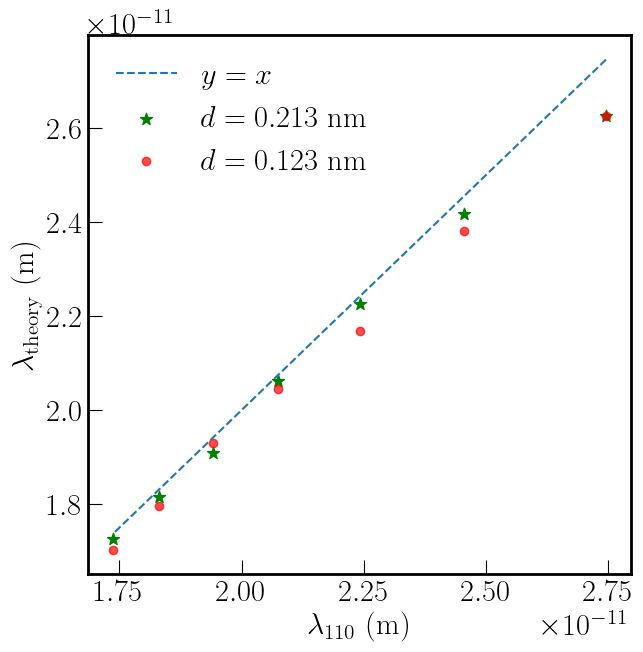

In [17]:
lambda_theory = df.iloc[:, 14]  # Column O
lambda_110 = df.iloc[:, 13]  # Column N
lambda_100 = df.iloc[:, 12]  # Column M
D2 = df.iloc[:, 5]         # ring diameters for 110 reflection

# Remove NaN values
mask = ~(lambda_theory.isna() | lambda_100.isna() | lambda_110.isna())
lambda_100, lambda_theory, lambda_110  = lambda_100[mask], lambda_theory[mask], lambda_110[mask]

lambda_theory = lambda_theory[mask].astype(float)
lambda_110 = lambda_110[mask].astype(float)
lambda_100 = lambda_100[mask].astype(float)
#D2 = D2[mask].astype(float)

# # 2) Estimate uncertainty in lambda_110
# Delta_D = 0.2  # mm (caliper resolution)
# sigma_lambda_110 = lambda_110 * (Delta_D / D2)

# # 3) Make the plot
# plt.errorbar(lambda_110, lambda_theory,
#              xerr=sigma_lambda_110, fmt="o", capsize=5,
#              label=r"Data with $1\sigma$ error")

plt.plot(lambda_theory, lambda_theory, linestyle="--", label=r"$y=x$")
plt.scatter(lambda_theory, lambda_100, color="green", marker="*", s=80, label=r"$d=0.213$ nm")
plt.scatter(lambda_theory, lambda_110, color="red", label=r"$d=0.123$ nm", alpha=0.7)
# Labels
plt.xlabel(r"$\lambda_{110}$ (m)")
plt.ylabel(r"$\lambda_{\mathrm{theory}}$ (m)")
plt.legend()
plt.grid(False)


plt.savefig('plot.png')

## Error Propagation

In [ ]:
import pandas as pd
import numpy as np
from uncertainties import unumpy
from uncertainties import ufloat

# Load Excel file
file_path = "Electron Diffraction 20_8.xlsx"
df = pd.read_excel(file_path)

# Extract relevant columns
V = df["V (in V)"]
D1 = df["d_1 (in m)"]
D2 = df["d_2 (in m)"]
# Clean data (remove NaNs)
mask = ~(V.isna() | D1.isna() | D2.isna())
V, D1, D2 = V[mask].astype(float), D1[mask].astype(float), D2[mask].astype(float)

D_errors=np.zeros_like(D1)
V_errors=np.zeros_like(V)

for i in range(len(D1)):
    D_errors=0.2e-3
for i in range(len(V)):
    D_errors=100

D1=unumpy.uarray(D1,D_errors)
D2=unumpy.uarray(D2,D_errors)
V=unumpy.uarray(V, V_errors)
# Constants
d100 = 0.213e-9  # m
d110 = 0.123e-9  # m
L = ufloat(0.127, 0.003)  # m (distance from foil to screen, from manuals)
D=0.13 #m

# Approximate Bragg angle: sinθ ≈ D/(2L) 
sintheta1 = (D*unumpy.sin(D1 / (2*D)))/(2*L)
sintheta2 = (D*unumpy.sin(D2 / (2*D)))/(2*L)

# λ from Bragg’s law: λ = 2 d sinθ
lambda_100_u = 2 * d100 * sintheta1
lambda_110_u = 2 * d110 * sintheta2

# Theoretical de Broglie wavelength: λ = h / sqrt(2 m e e V)
h = 6.62607015e-34
m_e = 9.10938356e-31
e = 1.602176634e-19

lambda_theory = h / unumpy.sqrt(2*m_e*e*V)


In [23]:
# --- Continuation of the code to create the table ---

# Extract nominal values and standard deviations (errors)
lambda_theory_vals = unumpy.nominal_values(lambda_theory)
lambda_theory_errors = unumpy.std_devs(lambda_theory)
lambda_100_vals = unumpy.nominal_values(lambda_100_u)
lambda_100_errors = unumpy.std_devs(lambda_100_u)
lambda_110_vals = unumpy.nominal_values(lambda_110_u)
lambda_110_errors = unumpy.std_devs(lambda_110_u)

# Create a Pandas DataFrame to display the results in a table
results_df = pd.DataFrame({
    'lambda_theory': lambda_theory_vals,
    'lambda_theory_error': lambda_theory_errors,
    'lambda_100': lambda_100_vals,
    'lambda_100_error': lambda_100_errors,
    'lambda_110': lambda_110_vals,
    'lambda_110_error': lambda_110_errors
})

# Print the table to the console
print("Comparison of Theoretical and Experimental Wavelengths")
print(results_df)


Comparison of Theoretical and Experimental Wavelengths
   lambda_theory  lambda_theory_error    lambda_100  lambda_100_error  \
0   2.742372e-11                  0.0  4.546723e-11      8.201463e-08   
1   2.452852e-11                  0.0  4.124306e-11      8.234430e-08   
2   2.239137e-11                  0.0  3.754810e-11      8.260539e-08   
3   2.073038e-11                  0.0  3.539852e-11      8.274567e-08   
4   1.939150e-11                  0.0  3.342772e-11      8.286683e-08   
5   1.828248e-11                  0.0  3.110555e-11      8.300048e-08   
6   1.734428e-11                  0.0  2.949449e-11      8.308744e-08   

     lambda_110  lambda_110_error  
0  1.516858e-11      4.807248e-08  
1  1.395646e-11      4.812677e-08  
2  1.285864e-11      4.817199e-08  
3  1.190447e-11      4.820825e-08  
4  1.102680e-11      4.823912e-08  
5  1.048642e-11      4.825694e-08  
6  9.965157e-12      4.827328e-08  


## Plot with errorbars

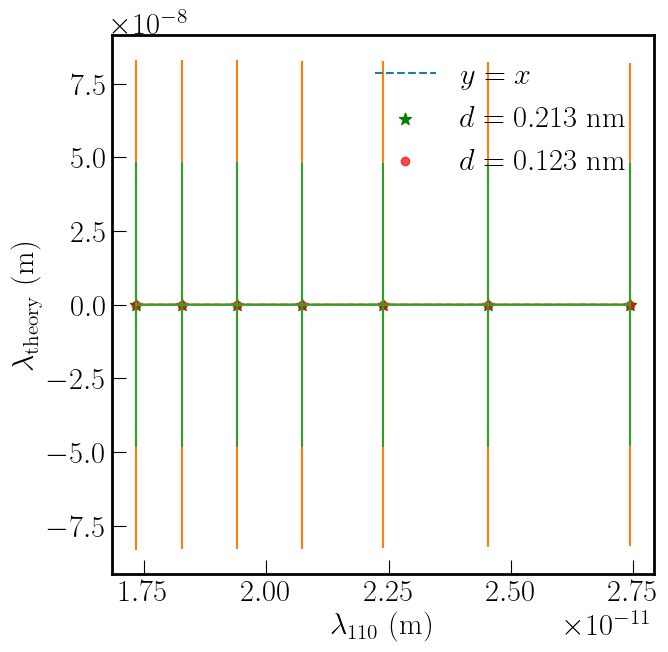

In [26]:
plt.plot(lambda_theory_vals, lambda_theory_vals, linestyle="--", label=r"$y=x$")
plt.scatter(lambda_theory_vals, lambda_100_vals, color="green", marker="*", s=80, label=r"$d=0.213$ nm")
plt.errorbar(lambda_theory_vals, lambda_100_vals, yerr=lambda_100_errors)
plt.scatter(lambda_theory_vals, lambda_110_vals, color="red", label=r"$d=0.123$ nm", alpha=0.7)
plt.errorbar(lambda_theory_vals, lambda_110_vals, yerr=lambda_110_errors)
# Labels
plt.xlabel(r"$\lambda_{110}$ (m)")
plt.ylabel(r"$\lambda_{\mathrm{theory}}$ (m)")
plt.legend()
plt.grid(False)


  V (kV) |       λ_100 (m) |       λ_110 (m) |    λ_theory (m)
-----------------------------------------------------------------
    2.00 | (8.95+/-0.08)e-11 | (2.97+/-0.05)e-11 | (2.74+/-0.01)e-11
    2.50 | (8.11+/-0.08)e-11 | (2.73+/-0.05)e-11 | (2.45+/-0.01)e-11
    3.00 | (7.37+/-0.08)e-11 | (2.52+/-0.05)e-11 | (2.24+/-0.01)e-11
    3.50 | (6.95+/-0.08)e-11 | (2.33+/-0.05)e-11 | (2.07+/-0.01)e-11
    4.00 | (6.56+/-0.08)e-11 | (2.16+/-0.05)e-11 | (1.94+/-0.01)e-11
    4.50 | (6.10+/-0.08)e-11 | (2.05+/-0.05)e-11 | (1.83+/-0.01)e-11
    5.00 | (5.78+/-0.08)e-11 | (1.95+/-0.05)e-11 | (1.73+/-0.01)e-11


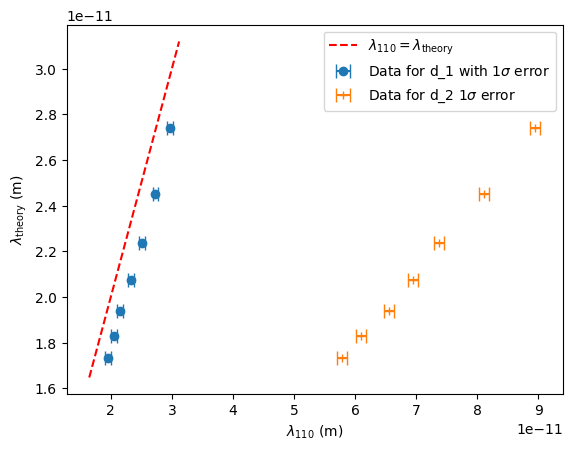

In [ ]:
import pandas as pd
import numpy as np
from uncertainties import ufloat, unumpy
import matplotlib.pyplot as plt

# -----------------------------
# Constants
# -----------------------------
d100 = 0.213e-9   # m, graphite lattice spacing
d110 = 0.123e-9   # m, graphite lattice spacing
L = 0.13          # m, distance foil -> screen (from manuals)
Delta_D = 0.5e-3  # m, caliper resolution ±0.5 mm
Delta_V_frac = 0.01  # 1% voltage uncertainty (adjust if needed)

h = 6.62607015e-34  # Planck's constant
m_e = 9.10938356e-31  # electron mass
e = 1.602176634e-19   # charge

# -----------------------------
# Load Data
# -----------------------------
file_path = "Electron Diffraction 20_8.xlsx"
df = pd.read_excel(file_path)

V_kV = df["V (in kV)"].dropna().astype(float).values
D1_mm = df["d_1 (in mm)"].dropna().astype(float).values
D2_mm = df["d_2 ( in mm)"].dropna().astype(float).values

# -----------------------------
# Build arrays with uncertainties
# -----------------------------
V = [ufloat(v*1e3, v*1e3*Delta_V_frac) for v in V_kV]  # volts
D1 = [ufloat(d*1e-3, Delta_D) for d in D1_mm]  # meters
D2 = [ufloat(d*1e-3, Delta_D) for d in D2_mm]  # meters

# -----------------------------
# Functions
# -----------------------------
def wavelength_from_bragg(D, d_spacing, L):
    """Compute wavelength with uncertainty from Bragg's law, sinθ ≈ D/(2L)."""
    theta = unumpy.arcsin(D / (2*L))
    return 2 * d_spacing * unumpy.sin(theta)

def wavelength_theory(V):
    """de Broglie wavelength with uncertainty in voltage."""
    return h / unumpy.sqrt(2*m_e*e*unumpy.uarray([v.n for v in V],[v.s for v in V]))

# -----------------------------
# Compute wavelengths
# -----------------------------
lambda_100 = [wavelength_from_bragg(d, d100, L) for d in D1]
lambda_110 = [wavelength_from_bragg(d, d110, L) for d in D2]
lambda_theory = [h/unumpy.sqrt(2*m_e*e*v) for v in V]  # V here has uncertainty

# -----------------------------
# Results Table
# -----------------------------
print(f"{'V (kV)':>8} | {'λ_100 (m)':>15} | {'λ_110 (m)':>15} | {'λ_theory (m)':>15}")
print("-"*65)
for v, l1, l2, lt in zip(V, lambda_100, lambda_110, lambda_theory):
    print(f"{v.n/1000:8.2f} | {l1:.2e} | {l2:.2e} | {lt:.2e}")

# -----------------------------
# Plot λ_theory vs λ_110 with error bars
# -----------------------------
lambda_theory_vals = [lt.n for lt in lambda_theory]
lambda_110_vals = [l.n for l in lambda_110]
lambda_110_errs = [l.s for l in lambda_110]
lambda_100_vals = [l.n for l in lambda_100]
lambda_100_errs = [l.s for l in lambda_100]

plt.errorbar(lambda_110_vals, lambda_theory_vals,
             xerr=lambda_110_errs, fmt="o", capsize=5,
             label=r"Data for $d_1$ with $1\sigma$ error")

plt.errorbar(lambda_100_vals, lambda_theory_vals,
             xerr=lambda_100_errs, fmt="+", capsize=5,
             label=r"Data for d_2 $1\sigma$ error")

lims = [min(min(lambda_110_vals), min(lambda_theory_vals))*0.95,
        max(max(lambda_110_vals), max(lambda_theory_vals))*1.05]
plt.plot(lims, lims, "r--", label=r"$\lambda_{110} = \lambda_{\rm theory}$")

plt.xlabel(r"$\lambda_{110}$ (m)")
plt.ylabel(r"$\lambda_{\rm theory}$ (m)")
plt.legend()
plt.show()


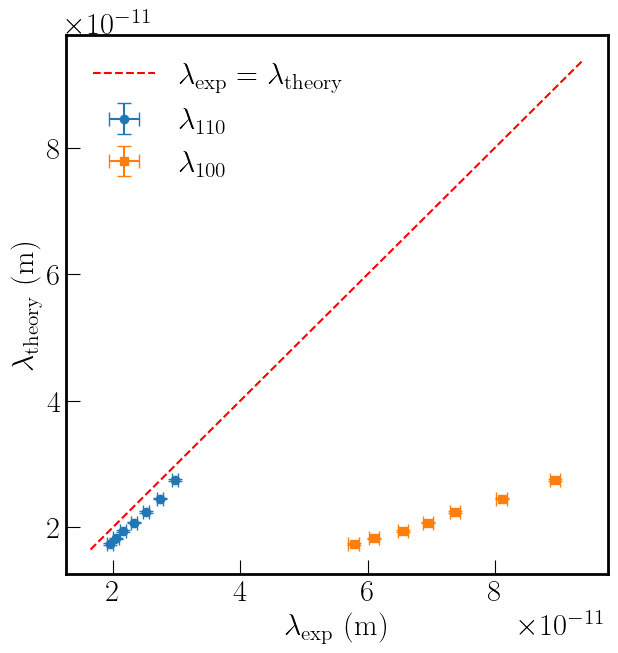

In [30]:
import pandas as pd
import numpy as np
from uncertainties import ufloat, unumpy
import matplotlib.pyplot as plt

# -----------------------------
# Constants
# -----------------------------
d100 = 0.213e-9   # m, graphite lattice spacing
d110 = 0.123e-9   # m, graphite lattice spacing
L = 0.13          # m, distance foil -> screen (from manuals)
Delta_D = 0.5e-3  # m, caliper resolution ±0.5 mm
Delta_V_frac = 0.01  # 1% voltage uncertainty (adjust if needed)

h = 6.62607015e-34  # Planck's constant
m_e = 9.10938356e-31  # electron mass
e = 1.602176634e-19   # charge

# -----------------------------
# Load Data
# -----------------------------
file_path = "Electron Diffraction 20_8.xlsx"
df = pd.read_excel(file_path)

V_kV = df["V (in kV)"].dropna().astype(float).values
D1_mm = df["d_1 (in mm)"].dropna().astype(float).values
D2_mm = df["d_2 ( in mm)"].dropna().astype(float).values

# -----------------------------
# Build arrays with uncertainties
# -----------------------------
V = [ufloat(v*1e3, v*1e3*Delta_V_frac) for v in V_kV]  # volts
D1 = [ufloat(d*1e-3, Delta_D) for d in D1_mm]  # meters
D2 = [ufloat(d*1e-3, Delta_D) for d in D2_mm]  # meters

# -----------------------------
# Functions
# -----------------------------
def wavelength_from_bragg(D, d_spacing, L):
    """Compute wavelength with uncertainty from Bragg's law, sinθ ≈ D/(2L)."""
    theta = unumpy.arcsin(D / (2*L))
    return 2 * d_spacing * unumpy.sin(theta)

# -----------------------------
# Compute wavelengths
# -----------------------------
lambda_100 = [wavelength_from_bragg(d, d100, L) for d in D1]
lambda_110 = [wavelength_from_bragg(d, d110, L) for d in D2]
lambda_theory = [h/unumpy.sqrt(2*m_e*e*v) for v in V]  # V has uncertainty

# -----------------------------
# Prepare data for plotting
# -----------------------------
lambda_theory_vals = [lt.n for lt in lambda_theory]
lambda_theory_errs = [lt.s for lt in lambda_theory]

lambda_100_vals = [l.n for l in lambda_100]
lambda_100_errs = [l.s for l in lambda_100]

lambda_110_vals = [l.n for l in lambda_110]
lambda_110_errs = [l.s for l in lambda_110]

# -----------------------------
# Plot λ_theory vs λ_110 and λ_100
# -----------------------------
plt.errorbar(lambda_110_vals, lambda_theory_vals,
             xerr=lambda_110_errs, yerr=lambda_theory_errs,
             fmt="o", capsize=5, label=r"$\lambda_{110}$")

plt.errorbar(lambda_100_vals, lambda_theory_vals,
             xerr=lambda_100_errs, yerr=lambda_theory_errs,
             fmt="s", capsize=5, label=r"$\lambda_{100}$")

lims = [min(lambda_100_vals + lambda_110_vals + lambda_theory_vals)*0.95,
        max(lambda_100_vals + lambda_110_vals + lambda_theory_vals)*1.05]
plt.plot(lims, lims, "r--", label=r"$\lambda_{\rm exp} = \lambda_{\rm theory}$")

plt.xlabel(r"$\lambda_{\rm exp}$ (m)")
plt.ylabel(r"$\lambda_{\rm theory}$ (m)")
plt.legend()
plt.show()
